**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 12: Clustering

*Clustering* corresponde a un modelo no supervisado, por lo tanto no existen *labels* en la base de datos, y se refiere a partir los datos en grupos mas pequeños denominados *cluster*. El objetivo es que la partición de los datos sea de tal forma que los datos de cada *cluster* sean muy similares entre si y muy diferentes a los datos de los otros *cluster*.

Inicialmente se importan las librerías generales a utilizar:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## K-Means clustering

Este método corresponde a uno de los mas simples y mas utilizados. Lo que hace es tratar de encontrar centros de *cluster* que sean representativos de ciertas regiones entre los datos.  Esencialmente el algoritmo consta de dos pasos: (i) asignar a cada dato el centro del *cluster* mas cercano, y (ii) y ajustar el centro del *cluster* al valor medio en términos de distancia de todos los datos asignados a dicho *cluster*. El algoritmo finaliza cuando los centros de los *cluster* no cambian significativamente entre cada iteración.

Para iniciar vamos a generar algunos puntos aleatorios utilizando la función *make_blobs*.

Los puntos generados se distribuyen de la siguiente manera. Se observa que existen tres *cluster* que agrupan los datos.

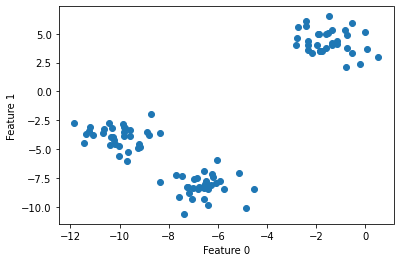

In [ ]:
X,y=make_blobs(random_state=1)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

### KMeans

El método *k-means* se basa en maximizar la distancia entre los puntso centrales de los cluster y simultaneamente minimizar la varianza entre los cluster. Como limitante tiene que previamente se debe establecer el numero *k*. Se implementa de la siguiente manera:

In [ ]:
km = KMeans(n_clusters=4)
model=km.fit(X)
y_kmeans=model.fit_predict(X)

In [ ]:
y_kmeans

array([1, 2, 2, 2, 0, 0, 0, 2, 3, 1, 2, 2, 0, 3, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 3, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 3, 1, 3, 1, 2, 0, 0, 0, 3, 0, 2, 2, 3, 1, 2, 0, 0, 2, 2, 0,
       3, 0, 1, 2, 2, 2, 0, 3, 3, 2, 0, 0, 1, 2, 3, 2, 2, 0, 1, 1, 3, 1,
       2, 3, 0, 1, 3, 2, 2, 0, 0, 3, 0, 1], dtype=int32)

Para conocer los centros de los *clusters* y los datos asignados a cada uno, se utiliza:

In [ ]:
centroids = model.cluster_centers_
print(centroids)
print('número de datos asignados a cada centroide:')
print(np.bincount(y_kmeans))

[[ -6.58196786  -8.17239339]
 [ -1.33824945   3.58202335]
 [-10.04935243  -3.85954095]
 [ -1.63933544   5.29379975]]
número de datos asignados a cada centroide:
[33 19 33 15]


Para graficar los datos de acuerdo con el *cluster* asignado a cada dato se utiliza:

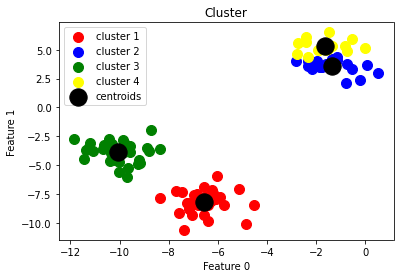

In [ ]:
X=np.array(X)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='yellow',label='cluster 4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='black', label='centroids')
plt.title('Cluster')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend();

## Hierarchical clustering

### Matriz de Distancias

In [ ]:
from scipy.spatial import distance_matrix
dd1=pd.DataFrame(distance_matrix(X,X,p=1))  ##distancia de Manhattan
dd1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,15.275215,17.210440,14.269754,14.249218,15.680481,16.168641,15.092584,5.412289,2.602856,...,14.999078,2.479143,3.962464,15.554958,13.731542,13.303105,17.633519,3.766500,14.673515,2.419736
1,15.275215,0.000000,2.645325,2.237593,8.203994,6.182327,6.426905,0.289339,16.755451,17.124293,...,6.217879,16.125158,17.089075,2.753903,1.543674,4.278878,6.566461,17.882075,5.193543,17.694951
2,17.210440,2.645325,0.000000,2.940686,10.849318,8.827652,9.072229,2.355986,18.690675,19.059517,...,8.863204,18.060383,19.024300,1.655481,3.478898,6.924203,9.211786,19.817299,7.838867,19.630176
3,14.269754,2.237593,2.940686,0.000000,10.441587,8.419920,8.664498,1.948254,15.749990,16.118832,...,8.455472,15.119697,16.083614,1.285204,1.244434,6.516471,8.804054,16.876614,7.431136,16.689490
4,14.249218,8.203994,10.849318,10.441587,0.000000,2.021667,1.919423,8.493333,15.729454,16.098296,...,1.986115,15.099161,16.063078,10.957896,9.197153,3.925116,3.384300,16.856078,3.010451,16.668954


In [ ]:
dd2=pd.DataFrame(distance_matrix(X,X,p=2)) #distancia Euclidiana
dd2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,10.849069,12.507712,10.419873,11.153418,11.583848,11.964496,10.741863,3.967617,2.257648,...,11.131137,1.853180,3.081494,11.391709,9.860869,9.618581,12.985104,3.239000,10.709908,1.773689
1,10.849069,0.000000,2.317632,1.734614,5.846289,4.380948,4.588208,0.241941,12.176361,12.136610,...,4.401038,11.425879,12.214774,1.957324,1.297939,3.331518,4.933559,12.751140,3.696953,12.524328
2,12.507712,2.317632,0.000000,2.099271,7.952249,6.335148,6.457193,2.240087,13.249590,13.517797,...,6.459354,12.820997,13.452490,1.173117,2.723268,5.621915,6.520583,14.014755,5.825969,14.090199
3,10.419873,1.734614,2.099271,0.000000,7.383331,6.036771,6.272133,1.495450,11.204302,11.423023,...,6.001122,10.724750,11.374622,0.979369,0.958720,4.658262,6.664319,11.933735,5.262357,11.992432
4,11.153418,5.846289,7.952249,7.383331,0.000000,1.751521,1.849625,6.035229,14.065698,13.170057,...,1.501156,12.518545,13.658117,7.803219,6.513663,2.854966,2.658477,14.053957,2.149749,12.903288


In [ ]:
dd8=pd.DataFrame(distance_matrix(X,X,p=8)) #distancia de Minkowski
dd8.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,8.568076,10.675146,8.989878,10.507154,10.220225,10.586010,8.567018,3.451072,2.225967,...,9.894961,1.665227,2.888294,9.888958,8.138332,8.102229,11.391979,3.186680,9.231131,1.542494
1,8.568076,0.000000,2.290275,1.621615,4.688001,3.419646,3.706801,0.235985,10.390932,9.481564,...,3.413289,8.915336,9.915131,1.551101,1.268417,3.125629,4.463744,10.252320,2.950401,9.712432
2,10.675146,2.290275,0.000000,1.695661,6.914998,5.217113,5.150571,2.236921,10.362863,10.600356,...,5.548922,10.101251,10.374576,0.915714,2.565614,5.415793,5.059106,10.815198,5.190904,11.610835
3,8.989878,1.621615,1.695661,0.000000,5.693393,4.955207,5.300159,1.385670,8.916166,8.919969,...,4.722626,8.415132,8.779280,0.900881,0.891391,3.782747,6.085123,9.202941,4.092570,9.917541
4,10.507154,4.688001,6.914998,5.693393,0.000000,1.726465,1.848256,4.777509,13.953077,12.732819,...,1.368284,12.171374,13.394980,6.238013,5.068754,2.441520,2.510984,13.693508,1.738607,12.047852


Qué diferencias encuentra entre las diferentes distancias?

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
Z=linkage(X,method='ward',metric='euclidean') # matriz Z con todos los enlaces creados
Z[:17]

array([[3.30000000e+01, 6.80000000e+01, 2.17280603e-02, 2.00000000e+00],
       [3.50000000e+01, 3.90000000e+01, 5.30292015e-02, 2.00000000e+00],
       [1.80000000e+01, 2.10000000e+01, 7.84081035e-02, 2.00000000e+00],
       [3.00000000e+01, 9.20000000e+01, 8.15250312e-02, 2.00000000e+00],
       [5.40000000e+01, 5.80000000e+01, 8.51937937e-02, 2.00000000e+00],
       [4.90000000e+01, 1.00000000e+02, 9.18063401e-02, 3.00000000e+00],
       [2.60000000e+01, 5.50000000e+01, 9.19612955e-02, 2.00000000e+00],
       [2.30000000e+01, 2.70000000e+01, 1.04595489e-01, 2.00000000e+00],
       [2.00000000e+01, 4.50000000e+01, 1.08282046e-01, 2.00000000e+00],
       [3.00000000e+00, 8.20000000e+01, 1.33940533e-01, 2.00000000e+00],
       [1.00000000e+00, 7.10000000e+01, 1.41502638e-01, 2.00000000e+00],
       [1.60000000e+01, 5.20000000e+01, 1.67456879e-01, 2.00000000e+00],
       [2.40000000e+01, 3.80000000e+01, 1.97457178e-01, 2.00000000e+00],
       [2.20000000e+01, 7.70000000e+01, 2.16850779e

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
C, coph_dist=cophenet(Z,pdist(X)) #Coeficiente de Cophenet
C

0.9715014515052091

Cophenetic Correlation Coefficient is simply correlation between distance matrix and Cophenetic matrix. As the valu of the Cophenetic Correlation Coefficient is quite close to 1, we can say that the clustering is quite fit.

In [ ]:
Z[106-len(X)] # para saber los puntos que se encuentran en el cluster 106, que se agrego  en el item 17 de Z

array([26.       , 55.       ,  0.0919613,  2.       ])

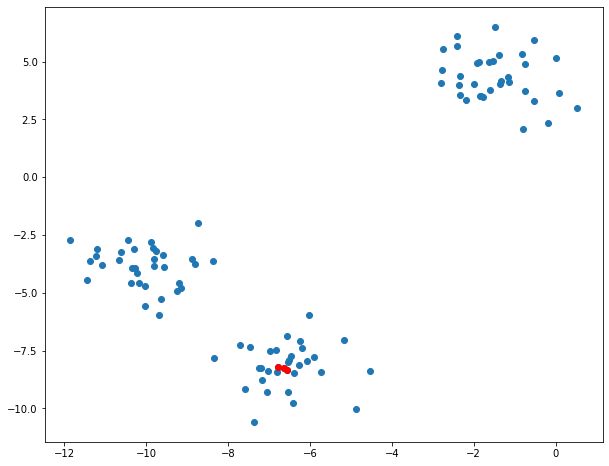

In [ ]:
idx=[26,55,40] # los tres puntos que agrego
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) #pintar todos los puntos
plt.scatter(X[idx,0],X[idx,1],c='r') #para destacar los tres puntos agregados
plt.show()

### Dendrograma

Una herramienta muy utilizada es el dendrograma, que despliega la relación de agrupamiento entre todos los datos. Cualquier línea horizontal que corte las líneas de color representa el número de *cluster* que se definen de acuerdo con la distancia entre ellos.  
Utilizando entonces la matriz Z de los enlaces creados se crea el dendrograma. Se puede definir el umbral para el color como un porcentaje de la distancia mayor (83), tambien truncarlo con los ultimos cluster formados (6). En cada *leaf* señala el numero de observaciones que tiene en cada cluster.

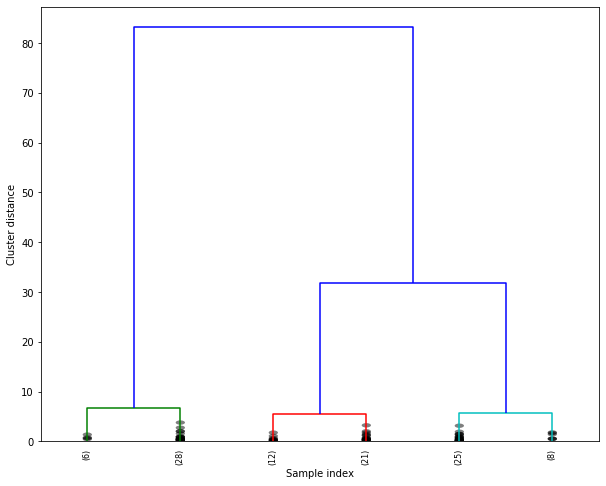

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8,color_threshold=0.2*83,truncate_mode='lastp',p=6,show_leaf_counts=True,show_contracted=True)
plt.show()

In [ ]:
Z[-6:,]

array([[181.        , 189.        ,   5.35790327,  28.        ],
       [186.        , 192.        ,   5.56931613,  33.        ],
       [190.        , 191.        ,   5.74288659,  33.        ],
       [182.        , 193.        ,   6.7779414 ,  34.        ],
       [194.        , 195.        ,  31.78952521,  66.        ],
       [196.        , 197.        ,  83.14546204, 100.        ]])

La anterior linea consulta las 6 últimas filas de los enlaces creados en el dendrograma truncado. El primero de la lista señala que juntó el cluster 181 con el 189, que tenian una distancia máxima de 5.3579, y en total sumaron 28 observaciones, que corresponde a la franja derecha del cluster verde. Las distancias entre los cluster que se van juntando a partir de este valor siguen siendo pequeñas, lo que señala que pertenecen a un mismo cluster (rojo y cyan). Hasta los dos últimos valores. La penúltima fila señala que se juntaron el cluster 194 (rojo con 33 observaciones) con el cluster 195 (cyan con 33 observaciones), con una distancias máxima de 31.7895 y en total reunieron 66 observaciones. Es decir que son dos cluster diferentes, que corresponden a la ultima agregacion que se observa en color azul. La última fila junta el cluster 196, que corresponde a la fila anterior, con el cluster que agrupa los colores verdes, con una distancia máxima de 83.14, valor grande que señala que son cluster diferentes, y que corresponden a la unión de azul y verde del dendrograma.

Para generar directamente el dendrograma:

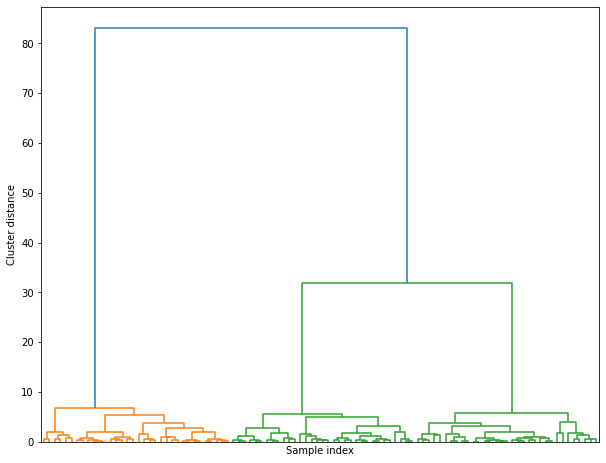

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'), no_labels=True, truncate_mode='level')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

Este método se implementa de la siguiente manera:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
print(hc.labels_)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


Para observar los datos se utiliza:

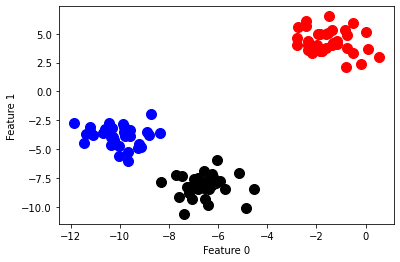

In [ ]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='black')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

Otra forma de visualizar los datos de manera mas sencilla es:

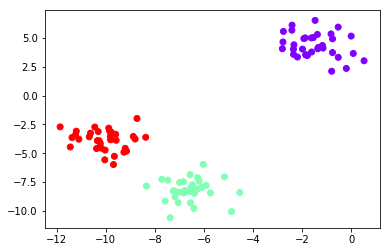

In [ ]:
plt.scatter(X[:,0],X[:,1], c=hc.labels_, cmap='rainbow');

Para gráficamente evaluar la distribución de los datos en cada *cluster* se utiliza:

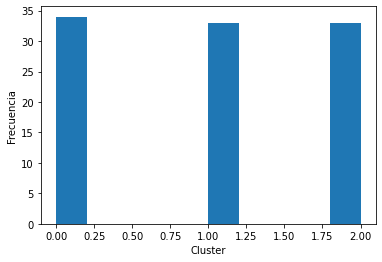

In [ ]:
prueba=pd.Series(hc.labels_)
plt.hist(prueba)
plt.xlabel('Cluster')
plt.ylabel('Frecuencia');

Como se mencionó anteriormente uno de los aspectos fundamentales en el método de *KMeans* es definir el número de *clusters* óptimo. Para eso se utilizan los siguientes métodos:

## *Elbow curve*

Este método minimiza las distancias entre todos los pares de puntos en un *cluster*, y se implementa de la siguiente manera utilizando la matriz Z. en este caso solo se revisan lso últimos 10 cluster formados. Es posible que la distancia mayor se presente al inicio y no al final.

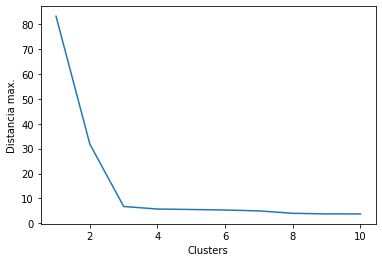

In [ ]:
last=Z[-10:,2]
last_rev=last[::-1] #e voltean
idx=np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
plt.xlabel('Clusters')
plt.ylabel('Distancia max.');

También se puede elaborar directamente sin la matriz Z, en función del score.

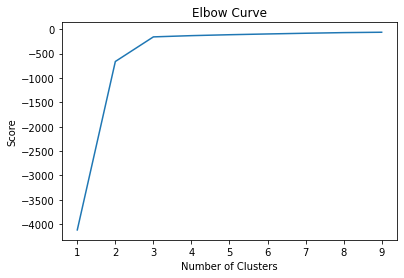

In [ ]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

El número de *cluster* óptimo corresponde al quiebre de la curva. En este caso tres.

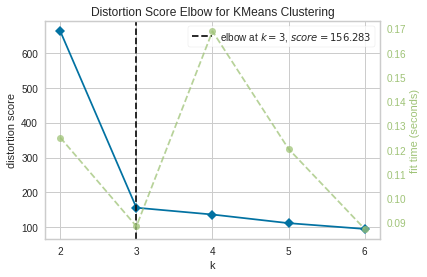

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

## Análisis *Silhouette*

Evalua qué tan juntos están los puntos en un *cluster* y qué tan lejos está de otro *cluster*.

### Silhouette score

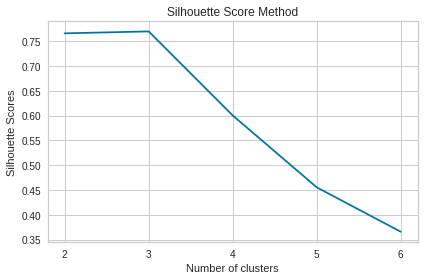

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

###Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2 The average silhouette_score is : 0.7658249517662835
For n_clusters = 3 The average silhouette_score is : 0.7697092791808455
For n_clusters = 4 The average silhouette_score is : 0.6002438798684412
For n_clusters = 5 The average silhouette_score is : 0.45750559088571974
For n_clusters = 6 The average silhouette_score is : 0.3327324262755456


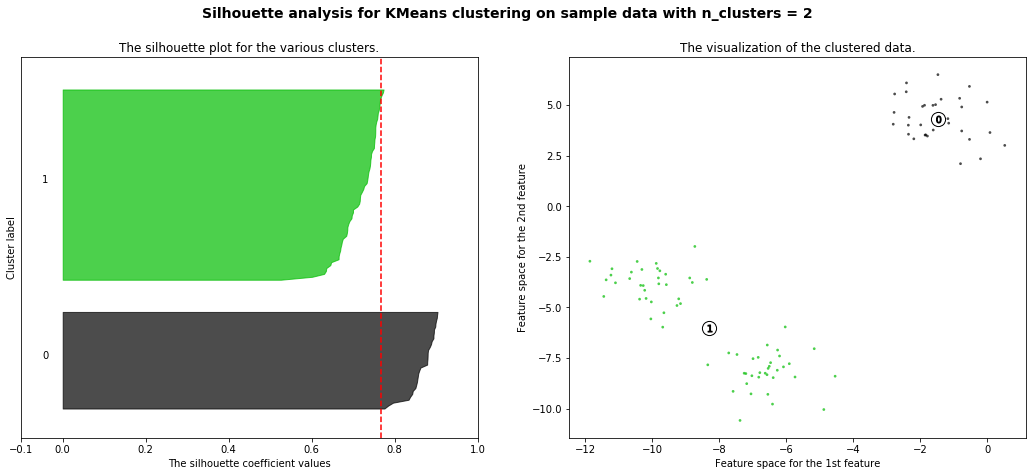

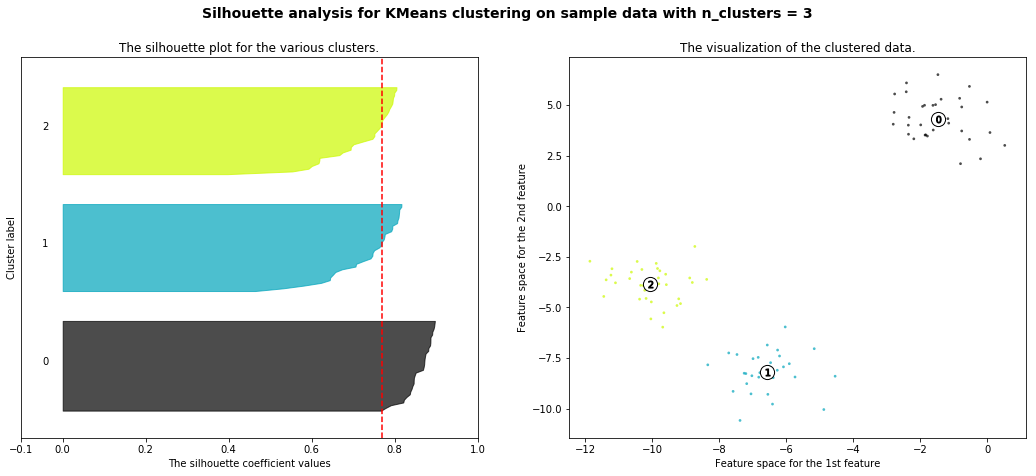

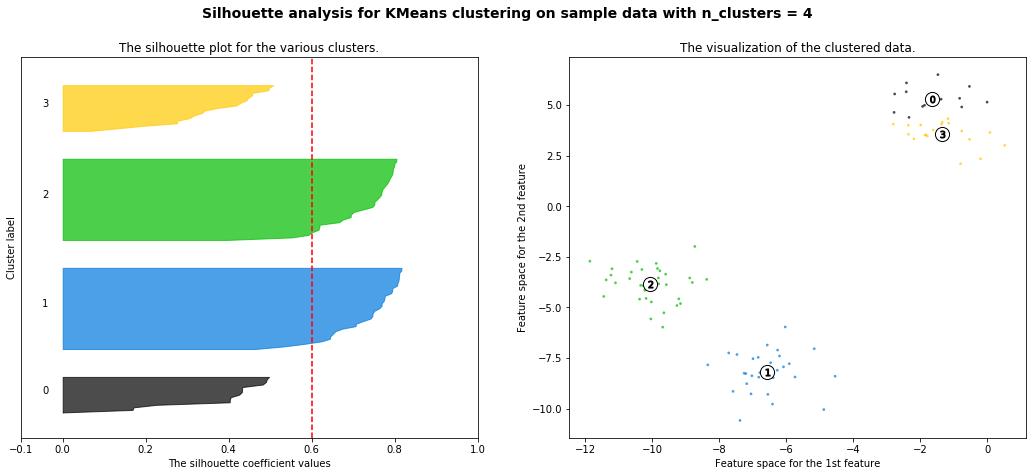

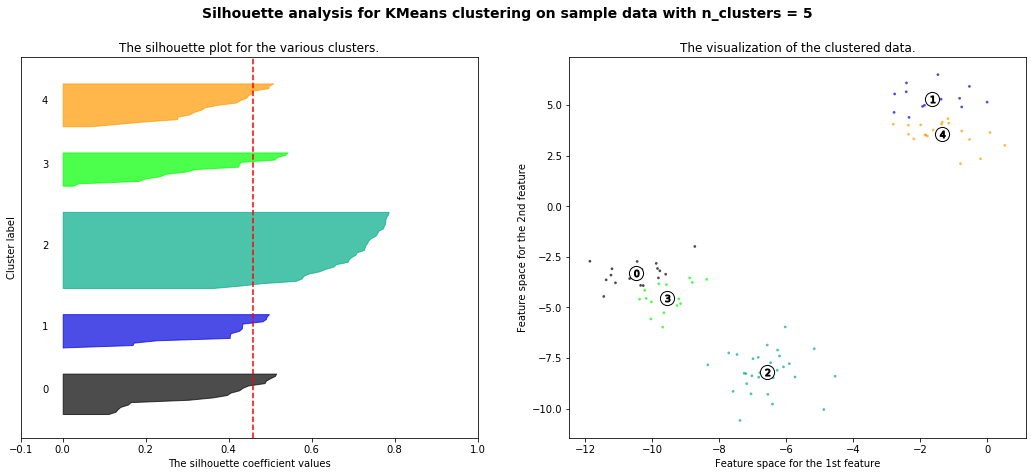

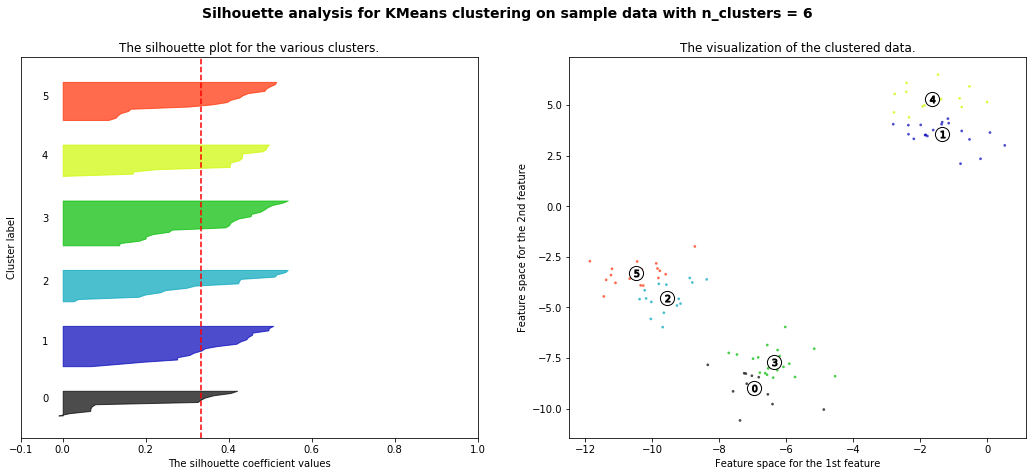

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Otra forma de obtener sólo el valor de Silhoutte es:

In [ ]:
from sklearn.metrics.cluster import silhouette_score

result=silhouette_score(X,y_kmeans)
print('KMeans:',result)
result2=silhouette_score(X,y_hc)
print('Aglomerative clustering:',result2)

KMeans: 0.7697092791808455
Aglomerative clustering: 0.7697092791808455


## Métrica de evaluación

Para evaluar el desempeño de los modelos *cluster* se utilizan diferentes métricas tales como:

##Cluster Cardinality and Magnitude
The cluster cardinality, or the cluster sizes, plot shows the number of points per cluster. You can use this chart to see if some clusters contain significantly fewer or more data points than the other clusters.

The cluster magnitude plot shows the total point to centroid distance per cluster. This chart can be used to see how high is the ‘spread’ of the points in each cluster and if there are any clumpy or wide clusters.

The Cardinality vs Magnitude plot compares cluster cardinality with cluster magnitude. Clusters with a higher cardinality tend to also have a higher cluster magnitude. The idea is that normal clusters lie on or are very close to the 45-degree line. Anomalies tend to lie more distant from it.

In [ ]:
!pip install data-science-utils

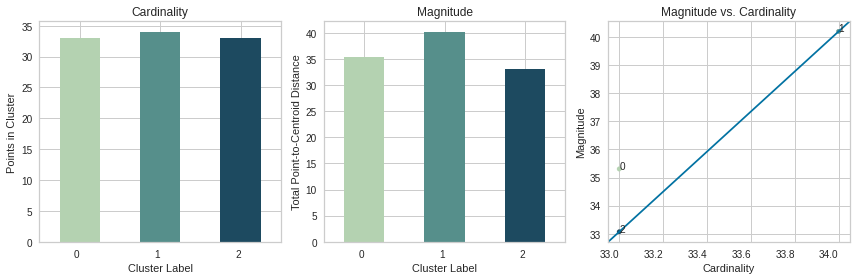

In [ ]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(model.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(X,
                       model.labels_,
                       model.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(X,
                              model.labels_,
                              model.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:model.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

### J-Score

J-score es la suma de las distancias cuadradas entre los puntos y el centro de los *clusters*, en teoría entre mas bajo mejor. solo funciona para Kmeans.

### Inertia

In [ ]:
kmeans.inertia_

156.28289251170003

### *Adjusted Rand Score*

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
result=adjusted_rand_score(y,y_kmeans)
print('KMeans:',result)
result_hc=adjusted_rand_score(y,y_hc)
print('Aglomerative clustering:',result_hc)

KMeans: 1.0
Aglomerative clustering: 1.0


## K-means in remote sensing

In [1]:
import rasterio as rio
from rasterio.plot import show

ModuleNotFoundError: ignored

In [ ]:
# open imagery
path = r'G:\My Drive\CATEDRA\SENSORES REMOTOS\Imagen\barranquilla/Composite_LE70090532003066EDC00.tif'
img = rio.open(path)
print(img.meta)

In [ ]:
img_arr = img.read()
vmin, vmax = np.nanpercentile(img_arr, (10,90))  # 10-90% contrast stretch

plt.figure(figsize=[20,20])
show(img, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

If we print the shape of this image we will see it has the order of (bands, height, width), this needs to be changed first to the shape order (height, width, bands). We will reform this shape by:
Creating an empty array using our image size, counts and data type from the meta data.
Use a for loop to slice each band and reform it in our empty array.

In [ ]:
imgxyb = np.empty((img.height, img.width, img.count), img.meta['dtype'])
print(imgxyb.shape)

In [ ]:
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = img.read(band+1)

In [ ]:
# convert to 1d array
img1d=imgxyb[:,:,:9].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))
img1d.shape

In [ ]:
cl = cluster.KMeans(n_clusters=4)
param = cl.fit(img1d)
img_cl = cl.labels_ # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)

In [ ]:
# Create a custom color map to represent our different 4 classes
import matplotlib.colors as mc
cmap = mc.LinearSegmentedColormap.from_list("", ["black","red","green","yellow"])
# Show the resulting array and save it as jpg image
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig("img_cluster.jpg", bbox_inches='tight')
plt.show()

## Consideraciones

Aunque *KMeans* es un método agil y efectivo, hay que tener cuidado con los datso cuando tienen una distribución espacial.

En el siguiente ejemplo se generarán unos valores aleatorios, pero se transformarán en dos patrones espaciales lineales

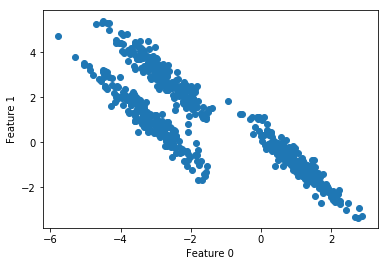

In [ ]:
X,y=make_blobs(random_state=170, n_samples=600)
rng=np.random.RandomState(74)
transformation=rng.normal(size=(2,2))
X=np.dot(X,transformation)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

Cuando se utiliza *KMeans* se seleccionan los *clusters* de acuerdo con la distancia, pero no considera el patron espacial que tienen los datos y que determina el grupo al cual pertenece cada dato.

In [ ]:
km=KMeans(n_clusters=3)
km.fit(X)
y_pred=km.predict(X)

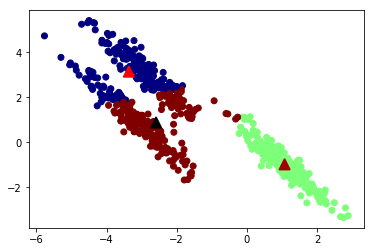

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='jet')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',c=[0,1,2],s=100,linewidth=2,cmap='flag');

Para estos casos se puede utilizar *Spectral clustering* de la siguiente forma:

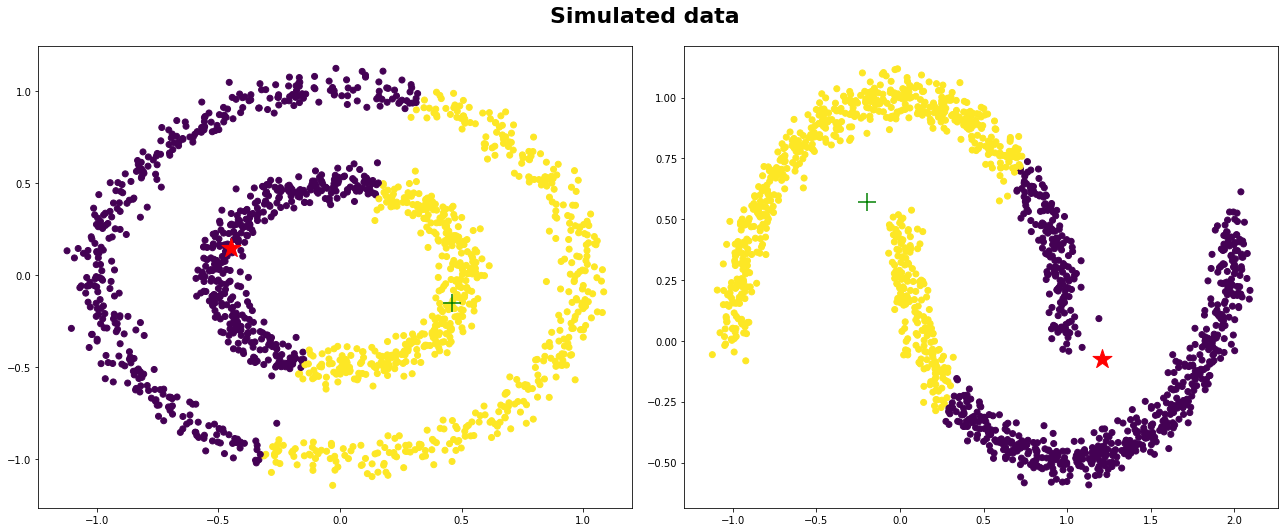

In [ ]:
# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    km = KMeans(n_clusters=2)
    km.fit(X[0])
    labels = km.predict(X[0])
    centroids = km.cluster_centers_

    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
    ax[i].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
    ax[i].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='green')
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()

C:\Users\Edier\AppData\Roaming\Python\Python36\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\Edier\AppData\Roaming\Python\Python36\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


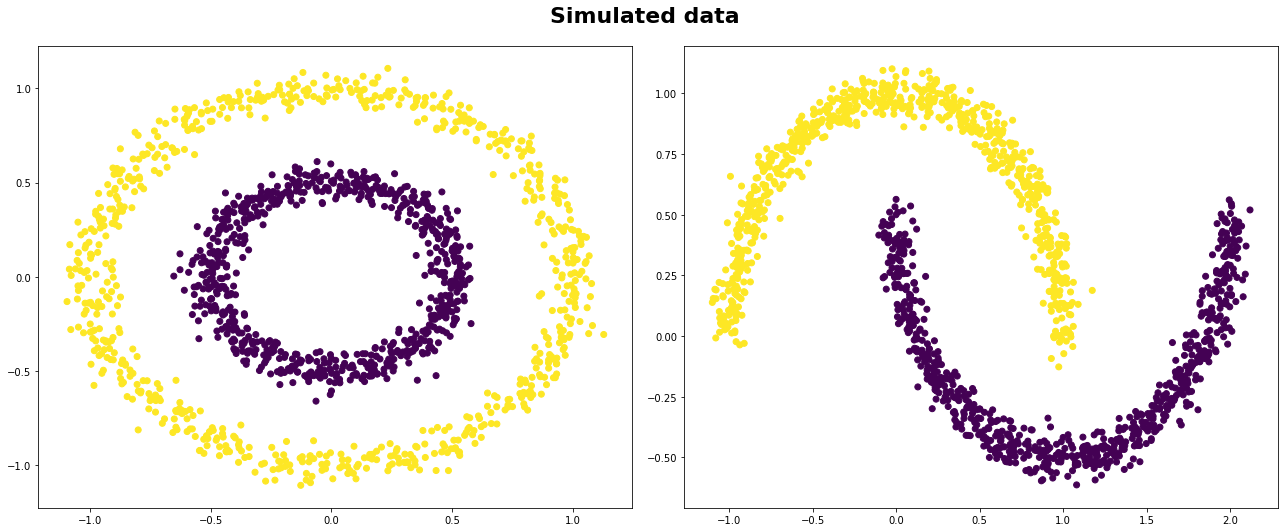

In [ ]:
# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1, X2]):
    fig.set_size_inches(18, 7)
    sp = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    sp.fit(X[0])
    labels = sp.labels_
    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()